In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rootPath = './train_posture'

In [2]:
imageGenerator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=1,
                                    #width_shift_range=0.05,
                                    #height_shift_range=0.05,
                                    #horizontal_flip=False,
                                    validation_split=.2)


#rescale: 원래 이미지에 입력된 값만큼 이미지의 크기에 곱해서 조율함.

#rotation_range: 지정된 각도 범위에서 임의로 원본 이미지를 회전.

#width_shift_range: 지정된 수평방향 내에서 임의로 원본 이미지를 좌우로 이동.

#height_shift_range: 지정된 수직방향 내에서 임의로 원본 이미지를 상하로 이동.

#brightness_range: 이미지 밝기를 랜덤하게 주는 것.

#horizontal_flip: 수평방향으로 뒤집기

#validation_split: 주어진 데이터셋을 test와 training으로 나누는 비율.


In [3]:
trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                                    target_size=(64,64),
                                                    subset='validation')


Found 692 images belonging to 5 classes.
Found 170 images belonging to 5 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

In [5]:
model.add(layers.InputLayer(input_shape=(64,64,3)))
model.add(layers.Conv2D(16,(3,3),(1,1),'same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

In [7]:
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Epoch 1/32
22/21 [==============================] - 6s 286ms/step - loss: 0.6578 - acc: 0.7269 - val_loss: 0.0355 - val_acc: 1.0000
Epoch 2/32
22/21 [==============================] - 3s 137ms/step - loss: 0.1633 - acc: 0.9725 - val_loss: 0.2502 - val_acc: 0.9702
Epoch 3/32
22/21 [==============================] - 3s 130ms/step - loss: 0.0216 - acc: 0.9942 - val_loss: 0.0906 - val_acc: 0.9765
Epoch 4/32
22/21 [==============================] - 3s 144ms/step - loss: 0.0071 - acc: 0.9986 - val_loss: 0.0884 - val_acc: 0.9781
Epoch 5/32
22/21 [==============================] - 3s 143ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.1102 - val_acc: 0.9765
Epoch 6/32
22/21 [==============================] - 3s 137ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0918 - val_acc: 0.9765
Epoch 7/32
22/21 [==============================] - 3s 137ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0869 - val_acc: 0.9765
Epoch 8/32
22/21 [==============================] - 3s 136ms/step - loss: 0.

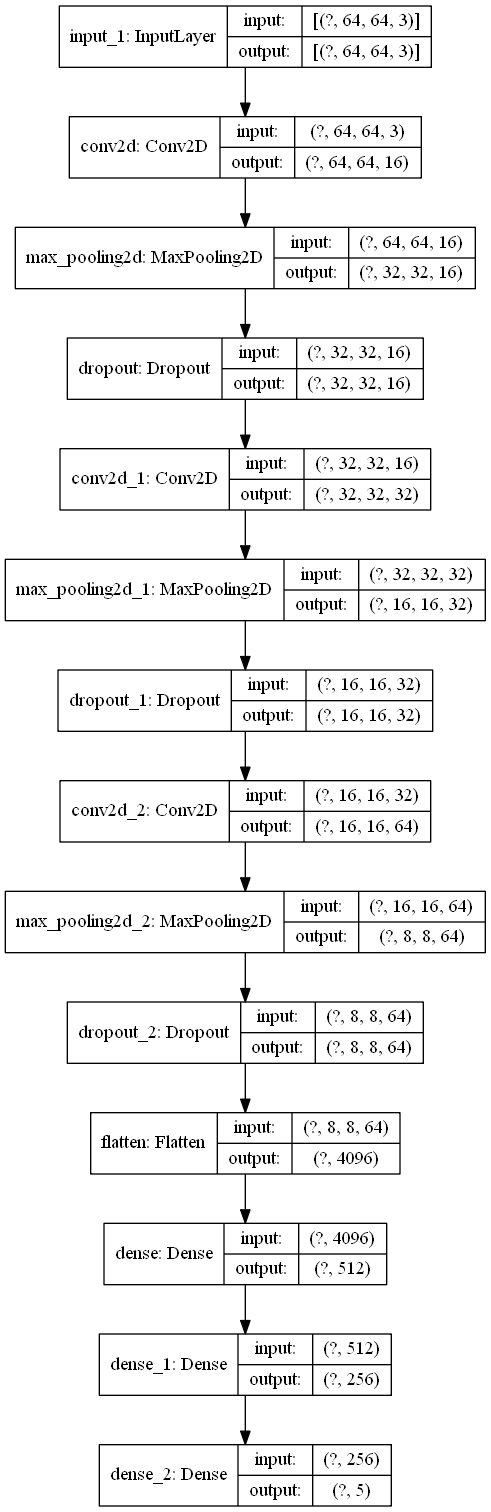

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

tf.keras.utils.plot_model(model, to_file='model_shapes.png', show_shapes=True)


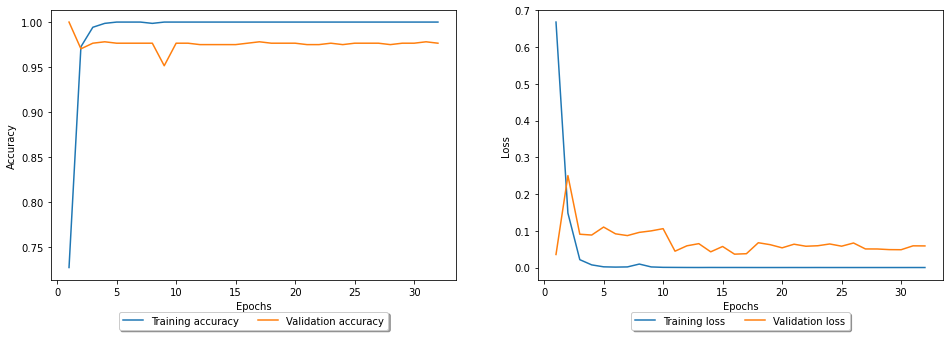

In [17]:
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 2))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, label='Training accuracy')
    plt.plot(epochs, val_accuracy, label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))
    fig = plt.gcf()
    plt.show()
    fig.savefig('./posture_result/reslut00.png' ,bbox_inches='tight')
show_graph(history.history)



In [18]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(64, 64),
)

#model.evaluate_generator(testGen)

Found 61 images belonging to 5 classes.


예측: Left
정답: Left


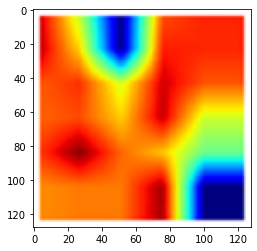

In [19]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['Back', 'Front', 'Left', 'Nomal', 'Right']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Nomal
정답: Nomal


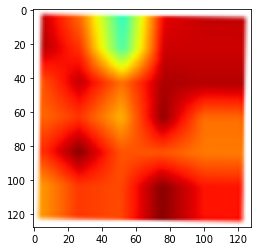

In [20]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Left
정답: Left


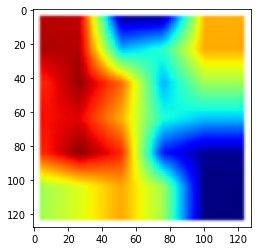

In [21]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Right
정답: Right


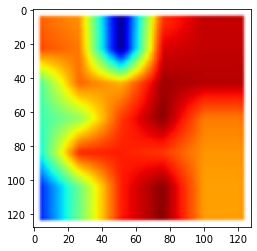

In [22]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Nomal
정답: Nomal


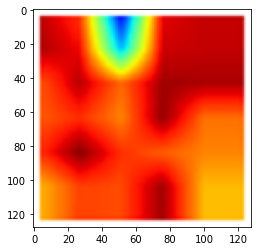

In [23]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Front
정답: Front


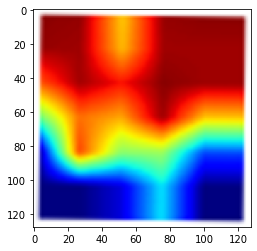

In [24]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Left
정답: Left


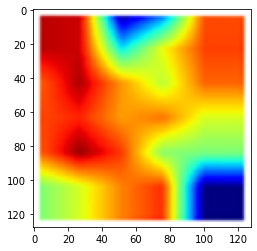

In [25]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Right
정답: Right


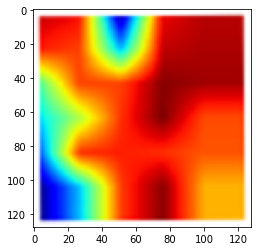

In [26]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Left
정답: Left


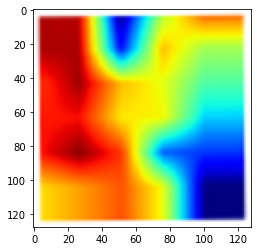

In [27]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Back
정답: Back


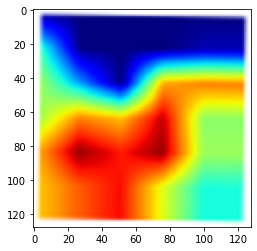

In [28]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Back
정답: Back


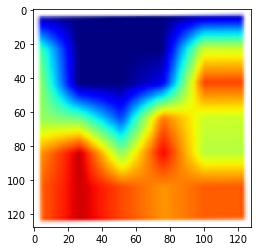

In [29]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Nomal
정답: Nomal


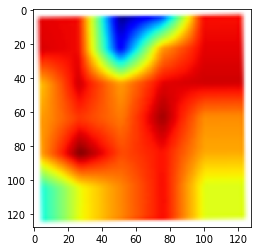

In [30]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 

예측: Front
정답: Front


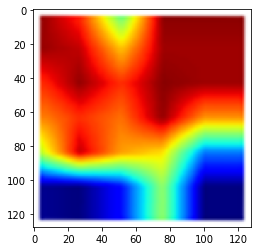

In [31]:
imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])])) 